In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Airbnb_Price_Prediction_cleanedData.csv')

In [3]:
df.shape

(74111, 48)

In [4]:
X = df.drop(['log_price'],axis=1)
 
Y = df.log_price.values 

In [5]:
from sklearn.preprocessing import StandardScaler 
X_scaled =  StandardScaler().fit_transform(X) 

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled,Y,test_size = 0.2, random_state=8854253)

### trying different algorithms

In [7]:
# Simple linear
def simple_linear():
    from sklearn.linear_model import LinearRegression

    # create the model
    model = LinearRegression()

    # train the model
    model.fit(x_train, y_train)
    
    return model

In [8]:
def ridge():
    from sklearn.linear_model import Ridge

    # create the model
    model = Ridge()

    # train the model
    model.fit(x_train, y_train)
    
    return model

In [9]:
def lasso():
    from sklearn.linear_model import Lasso

    # create the model
    model = Lasso()

    # train the model
    model.fit(x_train, y_train)
    
    return model

In [10]:
def knn():
    from sklearn.neighbors import KNeighborsRegressor
    model = KNeighborsRegressor(n_neighbors = 13)
    model.fit(x_train,y_train)
    return model

In [11]:
def svm():
    from sklearn.svm import SVR
    model = SVR()
    model.fit(x_train,y_train)
    return model

In [20]:
def randomForest():
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor()
    model.fit(x_train,y_train)
    return model

In [12]:
def evaluate_model(model, name):
    predictions = model.predict(x_test)
    
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    
    # create a dictionary to hold the result along with the model name
    result = {
        "name": name,
        "MAE": mean_absolute_error(y_test, predictions),
        "MSE": mean_squared_error(y_test, predictions),
        "RMSE": np.sqrt(mean_squared_error(y_test, predictions)),
        "R2 Score": r2_score(y_test, predictions)
    }
    
    return result

In [13]:
evaluate_model(simple_linear(),"simple linear")

{'name': 'simple linear',
 'MAE': 0.3624426211997535,
 'MSE': 0.22739857736964442,
 'RMSE': 0.47686326905062043,
 'R2 Score': 0.5584666153391559}

In [14]:
evaluate_model(ridge(),"ridge")

{'name': 'ridge',
 'MAE': 0.36244266458177105,
 'MSE': 0.2273985540185532,
 'RMSE': 0.4768632445665667,
 'R2 Score': 0.5584666606793092}

In [15]:
evaluate_model(lasso(),"lasso")

{'name': 'lasso',
 'MAE': 0.5627590447343465,
 'MSE': 0.5151438146759426,
 'RMSE': 0.7177351981587239,
 'R2 Score': -0.0002401717370219547}

In [16]:
evaluate_model(knn(),"KNN")

{'name': 'KNN',
 'MAE': 0.3688452832689843,
 'MSE': 0.2370519809973345,
 'RMSE': 0.4868798424635533,
 'R2 Score': 0.5397228746063246}

In [17]:
evaluate_model(svm(),"SVM")

{'name': 'SVM',
 'MAE': 0.33043020996407363,
 'MSE': 0.1968079234638209,
 'RMSE': 0.44363039059990117,
 'R2 Score': 0.6178636226303271}

In [21]:
evaluate_model(randomForest(),"Random Forest")

{'name': 'Random Forest',
 'MAE': 0.3061178636693424,
 'MSE': 0.17423407534025645,
 'RMSE': 0.4174135543322191,
 'R2 Score': 0.6616946249264204}

In [162]:
from sklearn.ensemble import RandomForestRegressor

#### training  without feature selection

In [164]:
df.columns

Index(['log_price', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'host_identity_verified', 'host_response_rate', 'instant_bookable',
       'neighbourhood', 'number_of_reviews', 'bedrooms', 'beds',
       'host_days_active', 'time_since_first_review', 'air_conditioning',
       'check_in_24h', 'high_end_electronics', 'balcony', 'nature_and_views',
       'breakfast', 'tv', 'cooking_basics', 'white_goods', 'elevator', 'gym',
       'child_friendly', 'parking', 'host_greeting', 'hot_tub_sauna_or_pool',
       'internet', 'long_term_stays', 'pets_allowed', 'private_entrance',
       'secure', 'smoking_allowed', 'accessible', 'event_suitable',
       'facilities_for_children'],
      dtype='object')

In [165]:
df['neighbourhood'].unique().max()

619

In [166]:
model = RandomForestRegressor(n_estimators=750,min_samples_split=7,min_samples_leaf=8,max_features=40,max_depth=20,bootstrap=True)
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=20, max_features=40, min_samples_leaf=8,
                      min_samples_split=7, n_estimators=750)

In [167]:
predictions = model.predict(x_test)
    
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    
# create a dictionary to hold the result along with the model name
result = {
        "MAE": mean_absolute_error(y_test, predictions),
        "MSE": mean_squared_error(y_test, predictions),
        "RMSE": np.sqrt(mean_squared_error(y_test, predictions)),
        "R2 Score": r2_score(y_test, predictions)
    }
print(result)

{'MAE': 0.310903997669633, 'MSE': 0.17653272890548855, 'RMSE': 0.4201579808899131, 'R2 Score': 0.6572313943268295}


In [10]:
model1 = RandomForestRegressor()
model1.fit(x_train, y_train)

RandomForestRegressor()

In [11]:
predictions1 = model1.predict(x_test)
    
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    
# create a dictionary to hold the result along with the model name
result = {
        "MAE": mean_absolute_error(y_test, predictions1),
        "MSE": mean_squared_error(y_test, predictions1),
        "RMSE": np.sqrt(mean_squared_error(y_test, predictions1)),
        "R2 Score": r2_score(y_test, predictions1)
    }
print(result)

{'MAE': 0.3060477670697912, 'MSE': 0.17473873509053928, 'RMSE': 0.41801762533479286, 'R2 Score': 0.6641345691809322}


In [44]:
df.columns

Index(['log_price', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'host_identity_verified', 'host_response_rate', 'instant_bookable',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'bedrooms', 'beds', 'host_days_active', 'time_since_first_review',
       'time_since_last_review', 'air_conditioning', 'check_in_24h',
       'high_end_electronics', 'bbq', 'balcony', 'nature_and_views',
       'bed_linen', 'breakfast', 'tv', 'coffee_machine', 'cooking_basics',
       'white_goods', 'elevator', 'gym', 'child_friendly', 'parking',
       'outdoor_space', 'host_greeting', 'hot_tub_sauna_or_pool', 'internet',
       'long_term_stays', 'pets_allowed', 'private_entrance', 'secure',
       'smoking_allowed', 'accessible', 'event_suitable',
       'facilities_for_children'],
      dtype='object')

### Using randomforest for feature selection

In [14]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestRegressor(n_estimators = 130))
sel.fit(X_scaled, Y)

SelectFromModel(estimator=RandomForestRegressor(n_estimators=130))

In [15]:
selected_feat = pd.DataFrame(X_scaled)
selected_feat = selected_feat.columns[(sel.get_support())]
len(selected_feat)

8

In [16]:
df1 = df.iloc[:,list(selected_feat)]
df1.head()

,property_type,room_type,accommodates,cleaning_fee,instant_bookable,neighbourhood,review_scores_rating,beds
0,0,0,3,1,0,77,1,1.0
1,0,0,7,1,1,252,4,3.0
2,0,0,5,1,1,247,4,3.0
3,17,0,4,1,0,325,5,2.0
4,0,0,2,1,1,119,0,1.0


In [17]:
df1.shape

(74111, 8)

In [16]:
df.columns

Index(['log_price', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'host_identity_verified', 'host_response_rate', 'instant_bookable',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'bedrooms', 'beds', 'host_days_active', 'time_since_first_review',
       'time_since_last_review', 'air_conditioning', 'check_in_24h',
       'high_end_electronics', 'bbq', 'balcony', 'nature_and_views',
       'bed_linen', 'breakfast', 'tv', 'coffee_machine', 'cooking_basics',
       'white_goods', 'elevator', 'gym', 'child_friendly', 'parking',
       'outdoor_space', 'host_greeting', 'hot_tub_sauna_or_pool', 'internet',
       'long_term_stays', 'pets_allowed', 'private_entrance', 'secure',
       'smoking_allowed', 'accessible', 'event_suitable',
       'facilities_for_children'],
      dtype='object')

In [18]:
X_new = df1
Y_new = Y

In [19]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_new,Y_new,test_size = 0.2, random_state=8577)

In [25]:
model2 = RandomForestRegressor(n_estimators=750,min_samples_split=10,min_samples_leaf=8,max_features=8,max_depth=20,bootstrap=True)
model2.fit(x_train1, y_train1)

RandomForestRegressor(max_depth=20, max_features=8, min_samples_leaf=8,
                      min_samples_split=10, n_estimators=750)

In [26]:
predictions2 = model2.predict(x_test1)
    
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    
# create a dictionary to hold the result along with the model name
result = {
        "MAE": mean_absolute_error(y_test1, predictions2),
        "MSE": mean_squared_error(y_test1, predictions2),
        "RMSE": np.sqrt(mean_squared_error(y_test1, predictions2)),
        "R2 Score": r2_score(y_test1, predictions2)
    }
print(result)

{'MAE': 0.33505143815020605, 'MSE': 0.20710889465207227, 'RMSE': 0.45509218258729983, 'R2 Score': 0.6071269787668525}


In [23]:
model0 = RandomForestRegressor()
model0.fit(x_train1, y_train1)

RandomForestRegressor()

In [24]:
predictions0 = model0.predict(x_test1)
    
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    
# create a dictionary to hold the result along with the model name
result = {
        "MAE": mean_absolute_error(y_test1, predictions0),
        "MSE": mean_squared_error(y_test1, predictions0),
        "RMSE": np.sqrt(mean_squared_error(y_test1, predictions0)),
        "R2 Score": r2_score(y_test1, predictions0)
    }
print(result)

{'MAE': 0.3456859863797199, 'MSE': 0.22630542117374366, 'RMSE': 0.4757156936382735, 'R2 Score': 0.5707123313688209}


### using an external package featurewiz

In [28]:
from featurewiz import featurewiz

Imported featurewiz. Version = 0.1.13. nrows=None uses all rows. Set nrows=1000 to randomly sample 1000 rows.
outputs = featurewiz(dataname, target, corr_limit=0.70, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']
                                


############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
**INFO: featurewiz can now read feather formatted files. Loading train data...
    Shape of your Data Set loaded: (74111, 48)
    Caution: We will try to reduce the memory usage of dataframe from 27.14 MB
        memory usage after optimization is: 5.87 MB
        decreased by 78.4%
     Loaded. Shape = (74111, 48)
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Single_Label Multi_Classification problem ####
    loading a rando

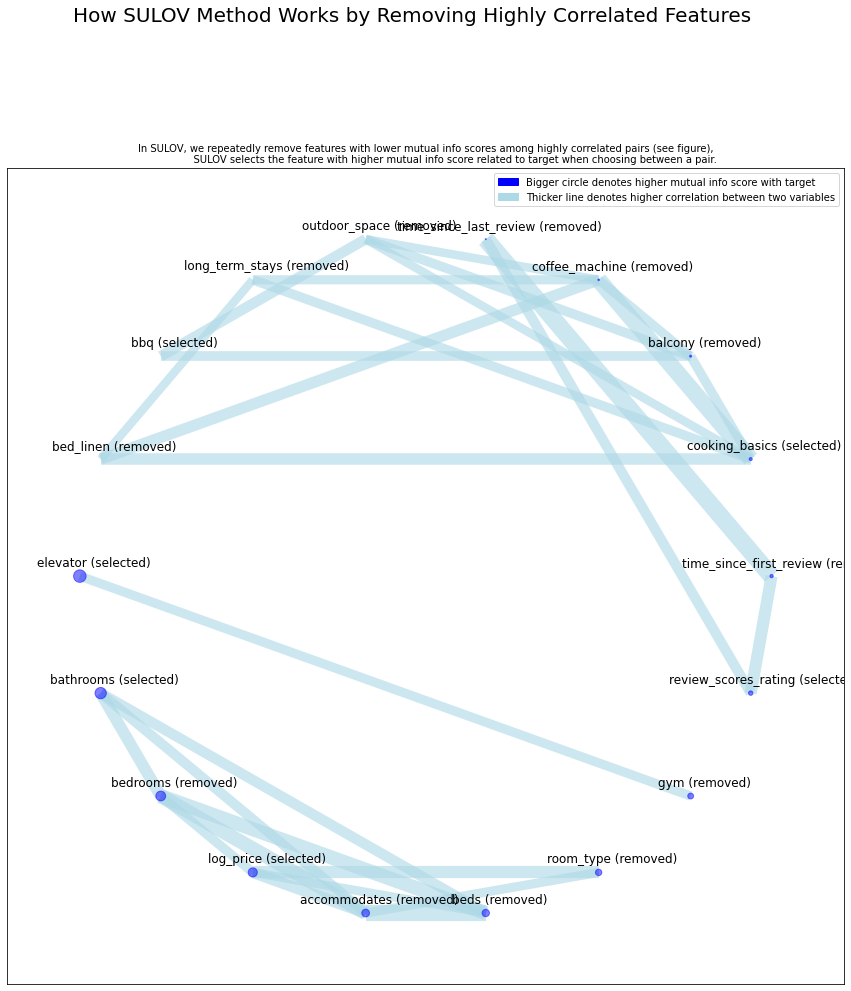

Time taken for SULOV method = 24 seconds
    Adding 0 categorical variables to reduced numeric variables  of 35
Final list of selected vars after SULOV = 35
############## F E A T U R E   S E L E C T I O N  ####################
    using regular XGBoost
Train and Test loaded into Dask dataframes successfully after feature_engg completed
Current number of predictors = 35 
    XGBoost version: 1.5.2
Number of booster rounds = 100
        using 35 variables...
            Time taken for regular XGBoost feature selection = 37 seconds
        using 28 variables...
            Time taken for regular XGBoost feature selection = 70 seconds
        using 21 variables...
            Time taken for regular XGBoost feature selection = 100 seconds
        using 14 variables...
            Time taken for regular XGBoost feature selection = 126 seconds
        using 7 variables...
            Time taken for regular XGBoost feature selection = 148 seconds


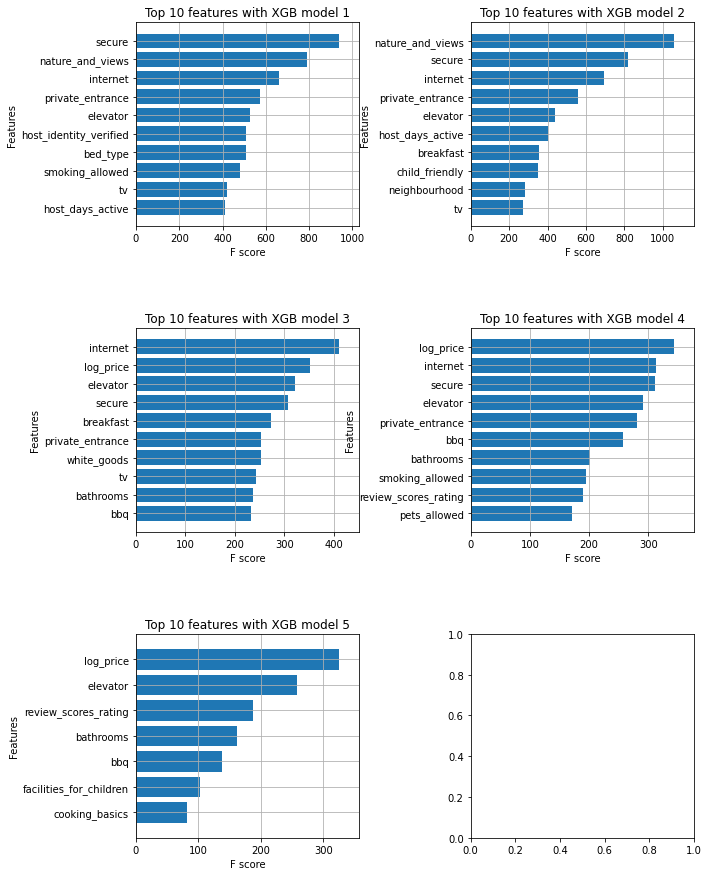

            Total time taken for XGBoost feature selection = 150 seconds
No ID variables [] are selected since they are not considered important for modeling
Selected 21 important features:
['secure', 'nature_and_views', 'internet', 'private_entrance', 'elevator', 'host_identity_verified', 'bed_type', 'smoking_allowed', 'tv', 'host_days_active', 'breakfast', 'child_friendly', 'neighbourhood', 'log_price', 'white_goods', 'bathrooms', 'bbq', 'review_scores_rating', 'pets_allowed', 'facilities_for_children', 'cooking_basics']
    Time taken = 174 seconds
    Reverted column names to original names given in train dataset
Returning list of 21 important features and a dataframe.


In [29]:
target = 'log_price'

features, train = featurewiz(df, target, corr_limit=0.4, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [30]:
print(type(features))
features

<class 'list'>


['private_entrance',
 'balcony',
 'hot_tub_sauna_or_pool',
 'pets_allowed',
 'white_goods',
 'city',
 'bathrooms',
 'secure',
 'breakfast',
 'beds',
 'bed_linen',
 'gym',
 'instant_bookable',
 'facilities_for_children',
 'cooking_basics',
 'accommodates',
 'high_end_electronics',
 'number_of_reviews',
 'long_term_stays',
 'event_suitable',
 'coffee_machine']

In [31]:
print(type(train))
train.head()

<class 'pandas.core.frame.DataFrame'>


,secure,nature_and_views,internet,private_entrance,elevator,host_identity_verified,bed_type,smoking_allowed,tv,host_days_active,...,neighbourhood,log_price,white_goods,bathrooms,bbq,review_scores_rating,pets_allowed,facilities_for_children,cooking_basics,property_type
0,0.0,0.0,1.0,0.0,0.0,1,4,0.0,0.0,3556.0,...,77,5.011719,0.0,1.0,0.0,1,0.0,0.0,0.0,0
1,0.0,0.0,1.0,0.0,0.0,0,4,0.0,0.0,1644.0,...,252,5.128906,1.0,1.0,0.0,4,0.0,0.0,0.0,0
2,0.0,0.0,1.0,0.0,0.0,1,4,0.0,1.0,1881.0,...,247,4.976562,0.0,1.0,0.0,4,0.0,0.0,0.0,0
3,0.0,0.0,1.0,0.0,0.0,1,4,0.0,1.0,2436.0,...,325,6.621094,1.0,1.0,0.0,5,0.0,0.0,0.0,17
4,0.0,0.0,1.0,0.0,1.0,1,4,0.0,1.0,2542.0,...,119,4.746094,0.0,1.0,0.0,0,0.0,0.0,0.0,0


In [32]:
train.columns

Index(['secure', 'nature_and_views', 'internet', 'private_entrance',
       'elevator', 'host_identity_verified', 'bed_type', 'smoking_allowed',
       'tv', 'host_days_active', 'breakfast', 'child_friendly',
       'neighbourhood', 'log_price', 'white_goods', 'bathrooms', 'bbq',
       'review_scores_rating', 'pets_allowed', 'facilities_for_children',
       'cooking_basics', 'property_type'],
      dtype='object')

In [33]:
X_fw = train.drop(['log_price'],axis=1)
Y_fw = train.log_price.values

In [34]:
X_fw = StandardScaler().fit_transform(X_fw) 

In [35]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X_fw,Y_fw,test_size = 0.2, random_state=553423)

In [36]:
model3 = RandomForestRegressor()
model3.fit(x_train2, y_train2)

RandomForestRegressor()

In [37]:
predictions3 = model3.predict(x_test2)
    
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    
# create a dictionary to hold the result along with the model name
result = {
        "MAE": mean_absolute_error(y_test2, predictions3),
        "MSE": mean_squared_error(y_test2, predictions3),
        "RMSE": np.sqrt(mean_squared_error(y_test2, predictions3)),
        "R2 Score": r2_score(y_test2, predictions3)
    }
print(result)

{'MAE': 0.42002138304646647, 'MSE': 0.3123667254157197, 'RMSE': 0.5588977772506523, 'R2 Score': 0.39463086353394505}


In [32]:
model4 = RandomForestRegressor(n_estimators=600,min_samples_split=96,min_samples_leaf=3,max_features=17,max_depth=74,bootstrap=True)
model4.fit(x_train2, y_train2)

RandomForestRegressor(max_depth=74, max_features=17, min_samples_leaf=3,
                      min_samples_split=96, n_estimators=600)

In [33]:
predictions4 = model4.predict(x_test2)
    
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    
# create a dictionary to hold the result along with the model name
result = {
        "MAE": mean_absolute_error(y_test2, predictions4),
        "MSE": mean_squared_error(y_test2, predictions4),
        "RMSE": np.sqrt(mean_squared_error(y_test2, predictions4)),
        "R2 Score": r2_score(y_test2, predictions4)
    }
print(result)

{'MAE': 0.3654702155430996, 'MSE': 0.2298217762939126, 'RMSE': 0.4793973052635075, 'R2 Score': 0.5546036151226393}


#### feature selection by filtering on correlation coefficient

In [86]:
selected_col = []
for col in df.columns:
    if df['log_price'].corr(df[col])**2 > 0.04:
        selected_col.append(col)
selected_col

['log_price',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'tv',
 'child_friendly']

In [87]:
selected_col = []
for col in df.columns:
    if (df['log_price'].corr(df[col]) > 0.2) or (df['log_price'].corr(df[col]) < -0.2):
        selected_col.append(col)
selected_col

['log_price',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'tv',
 'child_friendly']

In [35]:
df2 = df[selected_col]

In [36]:
df2.columns

Index(['log_price', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'tv', 'child_friendly'],
      dtype='object')

In [37]:
df2.shape

(74111, 8)

In [39]:
x = df2.drop(['log_price'], axis=1)
y = df2.log_price.values

NameError: name 'df2' is not defined

In [39]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x,y,test_size = 0.2, random_state=553423)

In [40]:
model5 = RandomForestRegressor()
model5.fit(x_train3, y_train3)

RandomForestRegressor()

In [41]:
predictions5 = model5.predict(x_test3)
    
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    
# create a dictionary to hold the result along with the model name
result = {
        "MAE": mean_absolute_error(y_test3, predictions5),
        "MSE": mean_squared_error(y_test3, predictions5),
        "RMSE": np.sqrt(mean_squared_error(y_test3, predictions5)),
        "R2 Score": r2_score(y_test3, predictions5)
    }
print(result)

{'MAE': 0.37448429200792005, 'MSE': 0.24462717704843, 'RMSE': 0.49459799539467403, 'R2 Score': 0.5260138581684225}


In [42]:
model6 = RandomForestRegressor(n_estimators=600,min_samples_split=96,min_samples_leaf=3,max_features=7,max_depth=74,bootstrap=True)
model6.fit(x_train3, y_train3)

RandomForestRegressor(max_depth=74, max_features=7, min_samples_leaf=3,
                      min_samples_split=96, n_estimators=600)

In [43]:
predictions6 = model6.predict(x_test3)
    
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    
# create a dictionary to hold the result along with the model name
result = {
        "MAE": mean_absolute_error(y_test3, predictions6),
        "MSE": mean_squared_error(y_test3, predictions6),
        "RMSE": np.sqrt(mean_squared_error(y_test3, predictions6)),
        "R2 Score": r2_score(y_test3, predictions6)
    }
print(result)

{'MAE': 0.37040028860316687, 'MSE': 0.2377856798379902, 'RMSE': 0.4876327304826761, 'R2 Score': 0.5392698459382763}


#### feature selection by filtering using anova test

In [43]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [55]:
y_chi = df.log_price.values

In [65]:
mod = SelectKBest(f_classif,k=10)
new = mod.fit(X,y_chi)

In [66]:
x_1 = new.transform(X)
x_1.shape

(74111, 10)

In [67]:
columns = new.get_support(indices=True)
columns

array([ 1,  2,  3,  5,  6, 14, 15, 18, 27, 33], dtype=int64)

In [68]:
df_new = df.iloc[:,columns]
df_new.head()

,property_type,room_type,accommodates,bed_type,cancellation_policy,review_scores_rating,bedrooms,time_since_first_review,breakfast,gym
0,0,0,3,4,2,1,1.0,0,0.0,0.0
1,0,0,7,4,2,4,3.0,0,0.0,0.0
2,0,0,5,4,1,4,1.0,0,1.0,0.0
3,17,0,4,4,0,5,2.0,5,0.0,0.0
4,0,0,2,4,1,0,0.0,0,0.0,0.0


In [69]:
df_new.shape

(74111, 10)

In [70]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(df_new,y_chi,test_size = 0.2, random_state=5555)

In [79]:
model7 = RandomForestRegressor(n_estimators=200,min_samples_split=25,min_samples_leaf=3,max_features=7,max_depth=80,bootstrap=True)
model7.fit(x_train4, y_train4)

RandomForestRegressor(max_depth=80, max_features=7, min_samples_leaf=3,
                      min_samples_split=25, n_estimators=200)

In [80]:
predictions7 = model7.predict(x_test4)
    
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    
# create a dictionary to hold the result along with the model name
result = {
        "MAE": mean_absolute_error(y_test4, predictions7),
        "MSE": mean_squared_error(y_test4, predictions7),
        "RMSE": np.sqrt(mean_squared_error(y_test4, predictions7)),
        "R2 Score": r2_score(y_test4, predictions7)
    }
print(result)

{'MAE': 0.36553124756149885, 'MSE': 0.22963603842452004, 'RMSE': 0.4792035459223148, 'R2 Score': 0.5484820989106884}


In [47]:
import seaborn as sns

<AxesSubplot:>

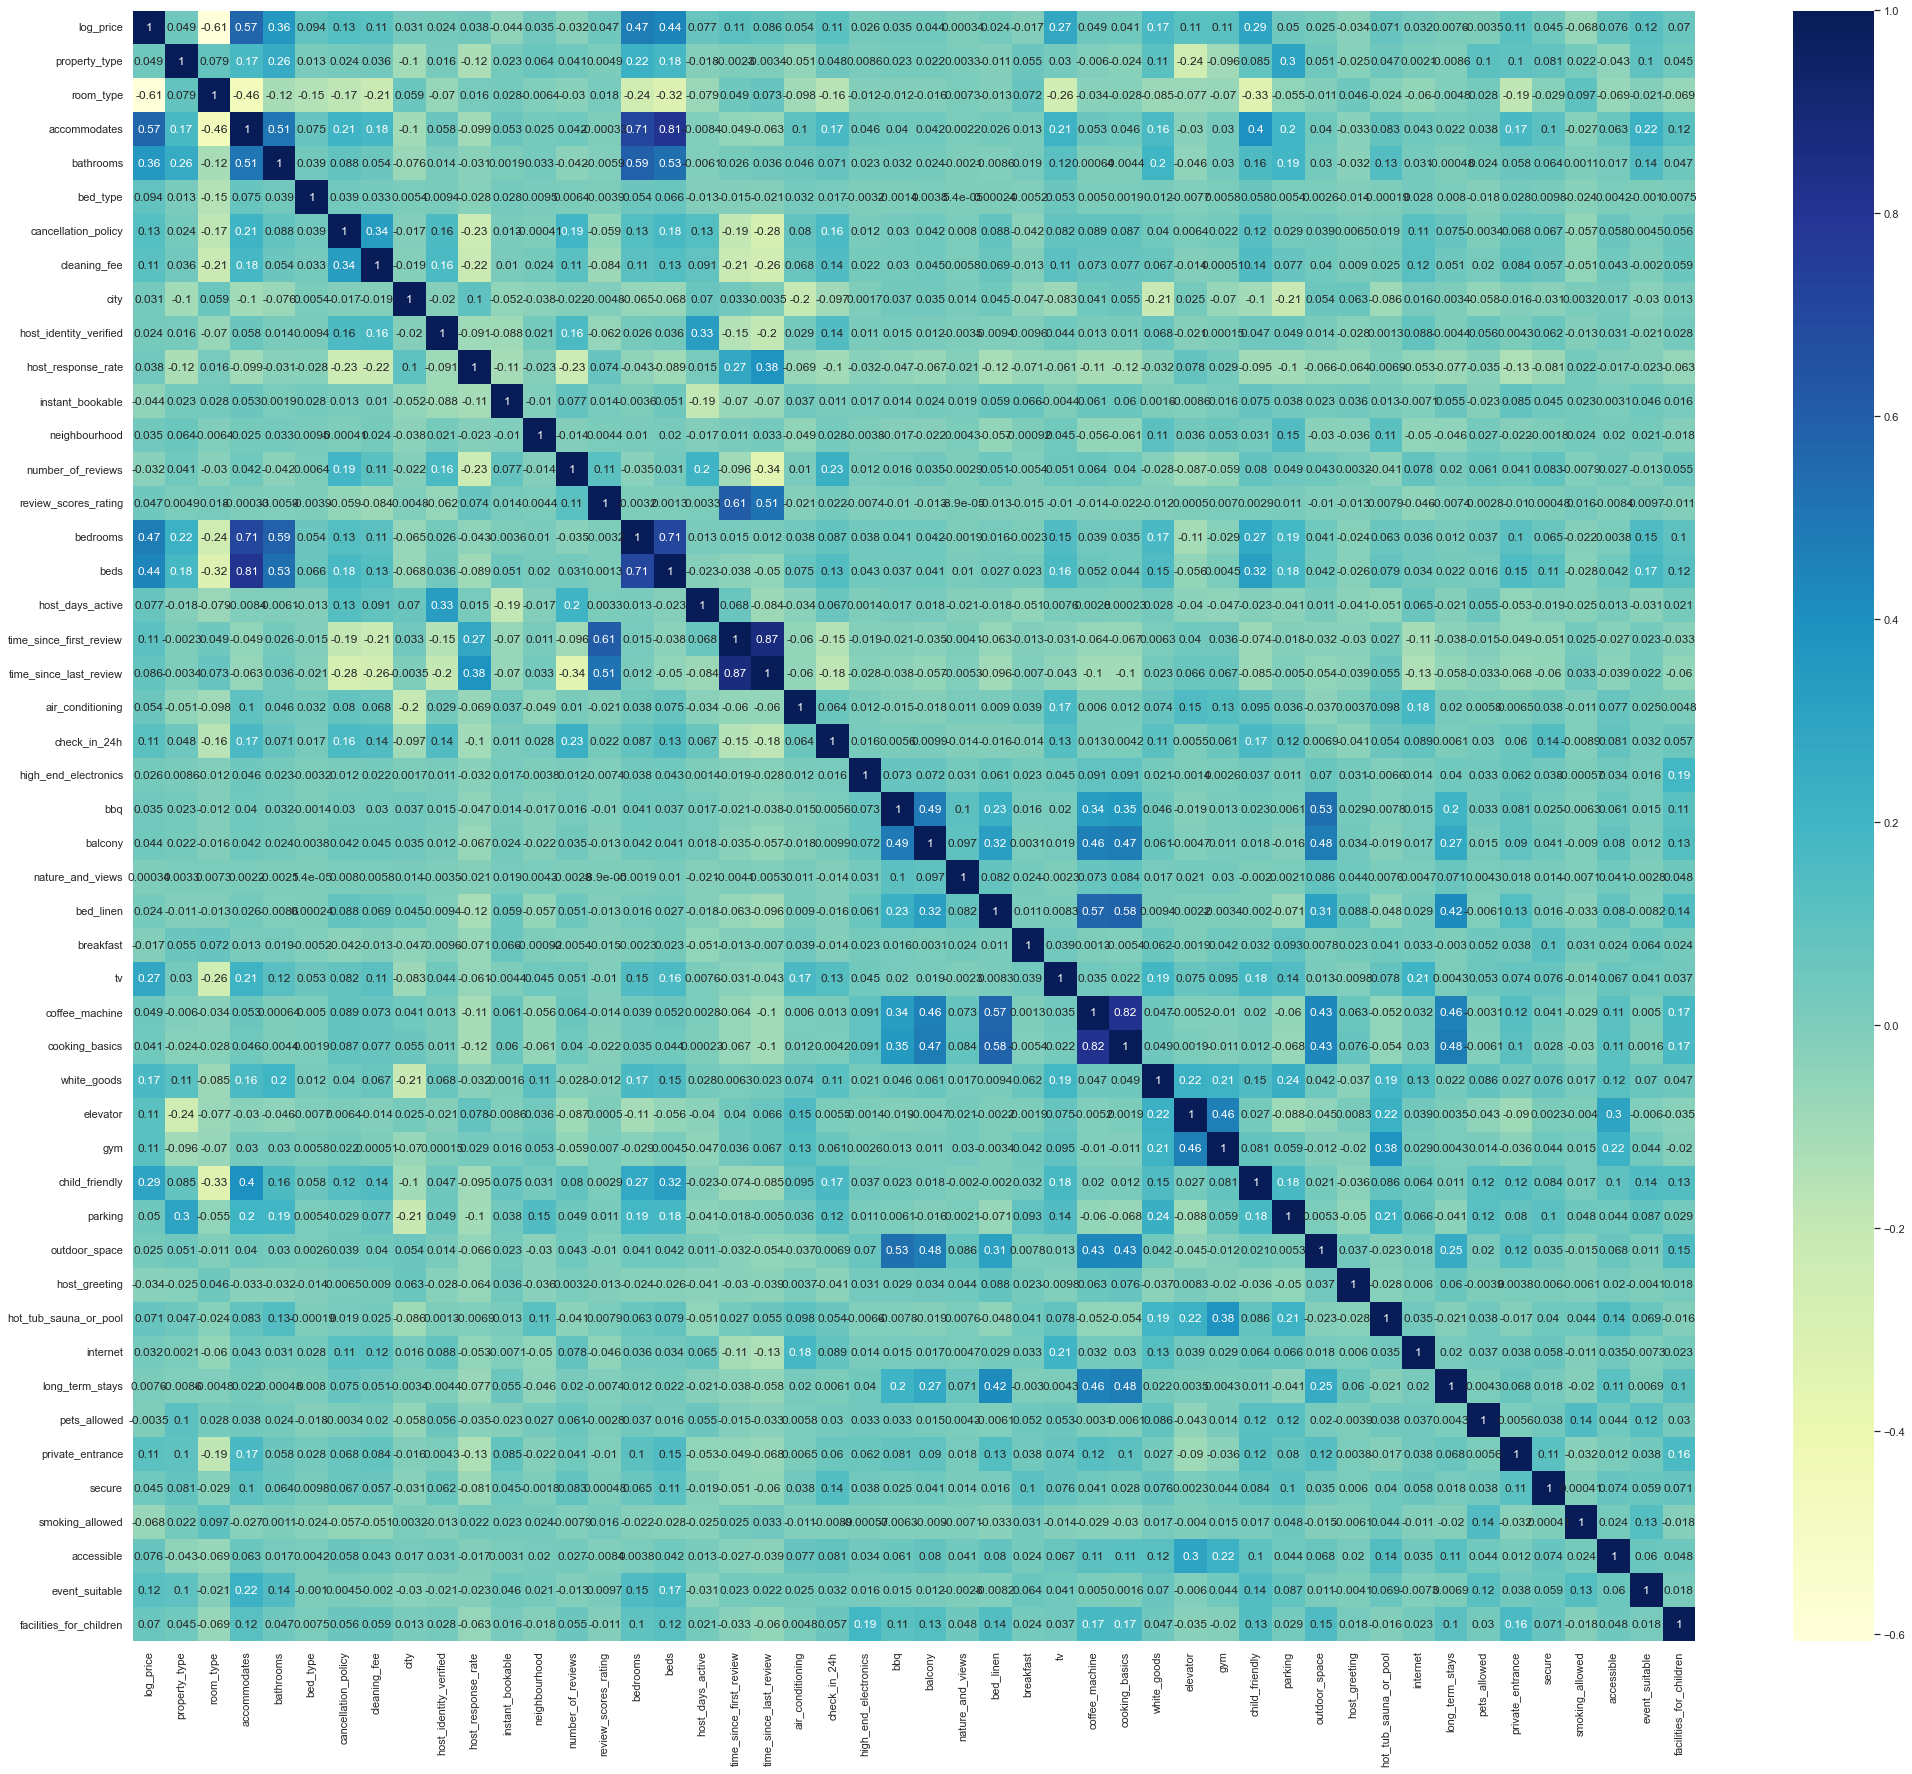

In [51]:
sns.set(rc={'figure.figsize':(35,30)})
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

### removing multicolinearity

In [22]:
mul_colinear_cols = []
for col1 in df.columns:
    for col2 in df.columns:
            if (col1 != col2) and (df[col1].corr(df[col2])**2 > 0.25):
                mul_colinear_cols.append((col1,col2))

In [23]:
mul_colinear_cols

[('log_price', 'room_type'),
 ('log_price', 'accommodates'),
 ('room_type', 'log_price'),
 ('accommodates', 'log_price'),
 ('accommodates', 'bathrooms'),
 ('accommodates', 'bedrooms'),
 ('accommodates', 'beds'),
 ('bathrooms', 'accommodates'),
 ('bathrooms', 'bedrooms'),
 ('bathrooms', 'beds'),
 ('review_scores_rating', 'time_since_first_review'),
 ('review_scores_rating', 'time_since_last_review'),
 ('bedrooms', 'accommodates'),
 ('bedrooms', 'bathrooms'),
 ('bedrooms', 'beds'),
 ('beds', 'accommodates'),
 ('beds', 'bathrooms'),
 ('beds', 'bedrooms'),
 ('time_since_first_review', 'review_scores_rating'),
 ('time_since_first_review', 'time_since_last_review'),
 ('time_since_last_review', 'review_scores_rating'),
 ('time_since_last_review', 'time_since_first_review'),
 ('bbq', 'outdoor_space'),
 ('bed_linen', 'coffee_machine'),
 ('bed_linen', 'cooking_basics'),
 ('coffee_machine', 'bed_linen'),
 ('coffee_machine', 'cooking_basics'),
 ('cooking_basics', 'bed_linen'),
 ('cooking_basics', 

In [24]:
len(mul_colinear_cols)

30

In [25]:
def remove_multicoll():
    for tp in mul_colinear_cols:
        for col in tp:
            if col == 'log_price':
                mul_colinear_cols.remove(tp)
    print(len(mul_colinear_cols))

In [26]:
for i in range(15):
    print("interation",(i+1))
    remove_multicoll()

interation 1
28
interation 2
27
interation 3
26
interation 4
26
interation 5
26
interation 6
26
interation 7
26
interation 8
26
interation 9
26
interation 10
26
interation 11
26
interation 12
26
interation 13
26
interation 14
26
interation 15
26


In [27]:
mul_colinear_cols

[('accommodates', 'bathrooms'),
 ('accommodates', 'bedrooms'),
 ('accommodates', 'beds'),
 ('bathrooms', 'accommodates'),
 ('bathrooms', 'bedrooms'),
 ('bathrooms', 'beds'),
 ('review_scores_rating', 'time_since_first_review'),
 ('review_scores_rating', 'time_since_last_review'),
 ('bedrooms', 'accommodates'),
 ('bedrooms', 'bathrooms'),
 ('bedrooms', 'beds'),
 ('beds', 'accommodates'),
 ('beds', 'bathrooms'),
 ('beds', 'bedrooms'),
 ('time_since_first_review', 'review_scores_rating'),
 ('time_since_first_review', 'time_since_last_review'),
 ('time_since_last_review', 'review_scores_rating'),
 ('time_since_last_review', 'time_since_first_review'),
 ('bbq', 'outdoor_space'),
 ('bed_linen', 'coffee_machine'),
 ('bed_linen', 'cooking_basics'),
 ('coffee_machine', 'bed_linen'),
 ('coffee_machine', 'cooking_basics'),
 ('cooking_basics', 'bed_linen'),
 ('cooking_basics', 'coffee_machine'),
 ('outdoor_space', 'bbq')]

In [28]:
feature_set = set()
for tp in mul_colinear_cols:
    for col in tp:
        feature_set.add(col)

In [29]:
feature_set

{'accommodates',
 'bathrooms',
 'bbq',
 'bed_linen',
 'bedrooms',
 'beds',
 'coffee_machine',
 'cooking_basics',
 'outdoor_space',
 'review_scores_rating',
 'time_since_first_review',
 'time_since_last_review'}

In [30]:
for col in feature_set:
    print(col + "  : " + str(df['log_price'].corr(df[col])) )

bathrooms  : 0.35517427197005147
time_since_first_review  : 0.10582459783461941
outdoor_space  : 0.024701573015654944
review_scores_rating  : 0.04747019771312469
bed_linen  : 0.024412426855256814
coffee_machine  : 0.049105917217389994
bbq  : 0.03499757114107992
time_since_last_review  : 0.08632719123461356
accommodates  : 0.5675742149786184
cooking_basics  : 0.04140972207195487
beds  : 0.4421368929173019
bedrooms  : 0.4731432497574289


In [31]:
df.drop(['coffee_machine','time_since_last_review', 'review_scores_rating', 'bbq',  'bed_linen', 'outdoor_space'], axis=1, inplace=True)

In [32]:
X = df.drop(['log_price'],axis=1)
 
Y = df.log_price.values 

In [33]:
#from sklearn.preprocessing import StandardScaler 
X_scaled =  StandardScaler().fit_transform(X) 

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled,Y,test_size = 0.2, random_state=8854253)

#### without feature selection

In [35]:
df.columns

Index(['log_price', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'host_identity_verified', 'host_response_rate', 'instant_bookable',
       'neighbourhood', 'number_of_reviews', 'bedrooms', 'beds',
       'host_days_active', 'time_since_first_review', 'air_conditioning',
       'check_in_24h', 'high_end_electronics', 'balcony', 'nature_and_views',
       'breakfast', 'tv', 'cooking_basics', 'white_goods', 'elevator', 'gym',
       'child_friendly', 'parking', 'host_greeting', 'hot_tub_sauna_or_pool',
       'internet', 'long_term_stays', 'pets_allowed', 'private_entrance',
       'secure', 'smoking_allowed', 'accessible', 'event_suitable',
       'facilities_for_children'],
      dtype='object')

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
model = RandomForestRegressor(n_estimators=750,min_samples_split=7,min_samples_leaf=8,max_features=25,max_depth=30,bootstrap=True)
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=30, max_features=25, min_samples_leaf=8,
                      min_samples_split=7, n_estimators=750)

In [44]:
predictions = model.predict(x_test)
    
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    
# create a dictionary to hold the result along with the model name
result = {
        "MAE": mean_absolute_error(y_test, predictions),
        "MSE": mean_squared_error(y_test, predictions),
        "RMSE": np.sqrt(mean_squared_error(y_test, predictions)),
        "R2 Score": r2_score(y_test, predictions)
    }
print(result)

{'MAE': 0.31188696821759404, 'MSE': 0.17636475487468448, 'RMSE': 0.4199580394214218, 'R2 Score': 0.6575575447505214}


In [142]:
model1 = RandomForestRegressor()
model1.fit(x_train, y_train)

RandomForestRegressor()

In [143]:
predictions1 = model1.predict(x_test)
    
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    
# create a dictionary to hold the result along with the model name
result = {
        "MAE": mean_absolute_error(y_test, predictions1),
        "MSE": mean_squared_error(y_test, predictions1),
        "RMSE": np.sqrt(mean_squared_error(y_test, predictions1)),
        "R2 Score": r2_score(y_test, predictions1)
    }
print(result)

{'MAE': 0.3057319104721969, 'MSE': 0.17437046182687682, 'RMSE': 0.41757689331053366, 'R2 Score': 0.6614298071436706}


In [151]:
df.columns

Index(['log_price', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'host_identity_verified', 'host_response_rate', 'instant_bookable',
       'neighbourhood', 'number_of_reviews', 'bedrooms', 'beds',
       'host_days_active', 'time_since_first_review', 'air_conditioning',
       'check_in_24h', 'high_end_electronics', 'balcony', 'nature_and_views',
       'breakfast', 'tv', 'cooking_basics', 'white_goods', 'elevator', 'gym',
       'child_friendly', 'parking', 'host_greeting', 'hot_tub_sauna_or_pool',
       'internet', 'long_term_stays', 'pets_allowed', 'private_entrance',
       'secure', 'smoking_allowed', 'accessible', 'event_suitable',
       'facilities_for_children'],
      dtype='object')